# Importing the Required Libraries
First, we import these libraries to be able to use the necessary functions.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Dataset Description:


This is a dataset consisting of 5000 rows and 14 columns that describe various features of customers' financial behavior.

Features:

ID: Customer ID, serves as a unique identifier for each customer.

Age: Customer's age.

Experience: Customer's years of experience.

Income: Income of the customer.

ZipCode: Customer's residence zipcode.

Family: Number of family members of the customer.

CCAvg: Average credit card spending per month.

Education: Level of education of the customer (e.g., undergraduate, graduate).

Mortgage: Indicates whether the customer has taken a mortgage (binary: 0 = No, 1 = Yes).

Personal Loan: Indicates whether the customer has taken a personal loan (binary: 0 = No, 1 = Yes).

Securities Account: Indicates whether the customer has a securities account (binary: 0 = No, 1 = Yes).

CD Account: Indicates whether the customer has a certificate of deposit (CD) account (binary: 0 = No, 1 = Yes).

Online: Indicates whether the customer uses online banking (binary: 0 = No, 1 = Yes).

Credit Card: Indicates whether the customer has a credit card (binary: 0 = No, 1 = Yes).

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("bankloan.csv")  # Replace "your_dataset.csv" with the actual filename

# Display the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print()

# Display the column names and their data types
print("Column names and data types:")
print(df.dtypes)
print()

# Display summary statistics for numerical features
print("Summary statistics for numerical features:")
print(df.describe())
print()

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

Number of rows: 5000
Number of columns: 14

Column names and data types:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

Summary statistics for numerical features:
                ID          Age   Experience       Income      ZIP.Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   

# Data Cleansing and Feature Engineering

We need to perform some operations to cleanse the data. We can fill the empty values for data cleansing and create new groups as feature engineering to more efficiently classify based on our features.

In [3]:
# Data Cleansing
# Handling missing values
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean

# Feature Engineering
# Creating Age and Income ranges
df['Age_range'] = pd.cut(df['Age'], bins=[22, 30, 40, 50, 60, 70], labels=['22-30', '31-40', '41-50', '51-60', '61-70'])
df['Income_class'] = pd.cut(df['Income'], bins=[7, 24, 100, 150, 200, 230], labels=['Poor', 'MiddleClass', 'UpperMiddleclass', 'Rich', 'SuperRich'])

# About the Data
Now, we will try to understand the data by using different visualizations.

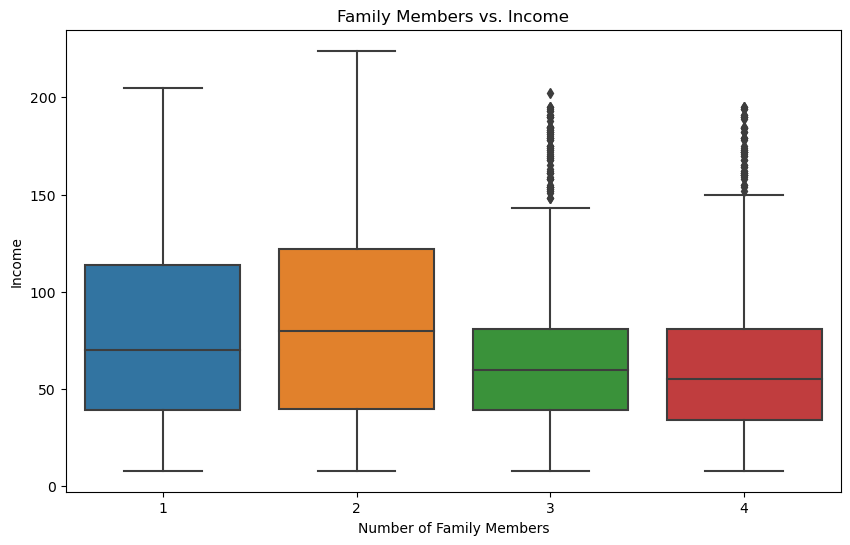

In [4]:
# Box Plot: Family Members vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family', y='Income', data=df)
plt.title('Family Members vs. Income')
plt.xlabel('Number of Family Members')
plt.ylabel('Income')
plt.show()

Here, we can observe the effect of the family members on income.

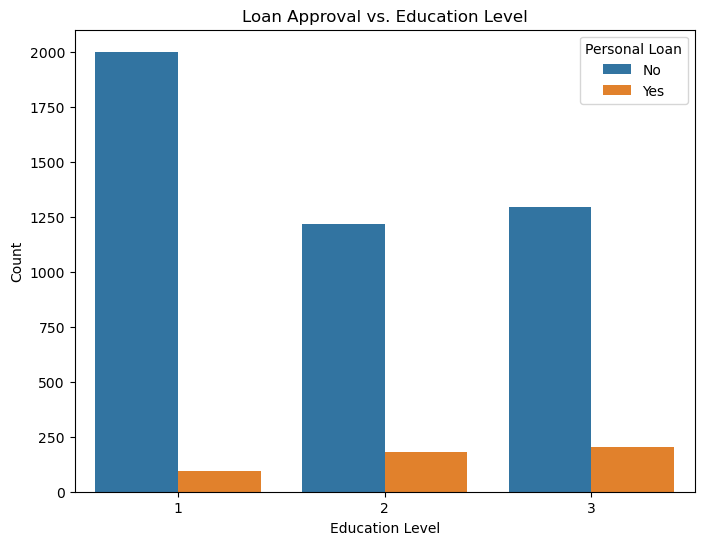

In [5]:
# Bar Plot: Loan Approval vs. Education Level
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal.Loan', data=df)
plt.title('Loan Approval vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right', labels=['No', 'Yes'])
plt.show()

Here, we see the loan aprroval for different education levels.

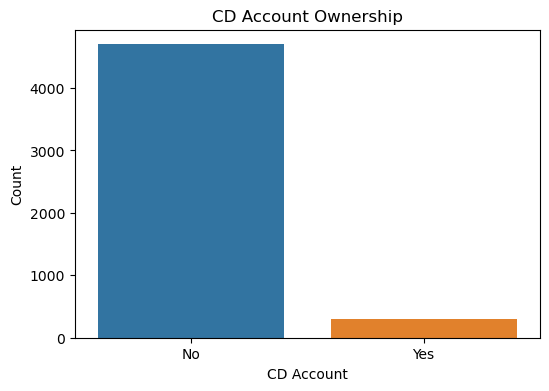

In [6]:
# Count Plot: CD Account Ownership
plt.figure(figsize=(6, 4))
sns.countplot(x='CD.Account', data=df)
plt.title('CD Account Ownership')
plt.xlabel('CD Account')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

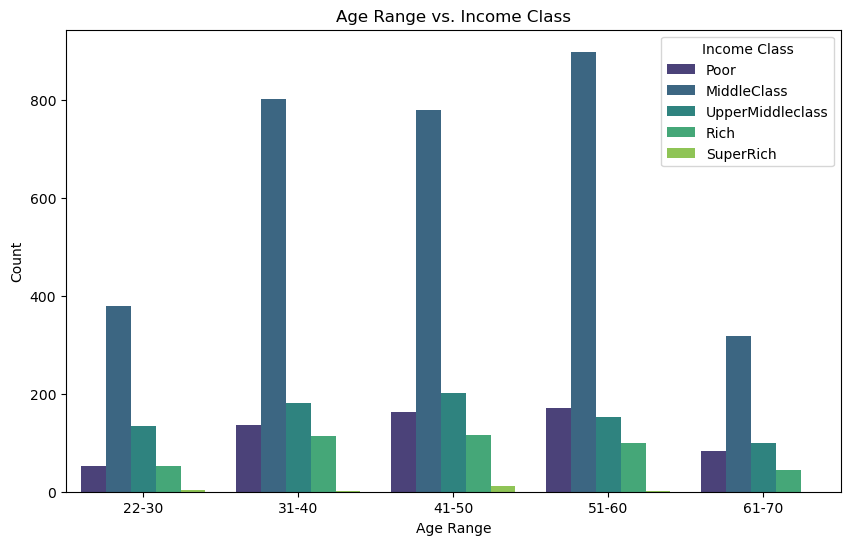

In [7]:
# Stacked Bar Plot: Age Range vs. Income Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_range', hue='Income_class', data=df, palette='viridis')
plt.title('Age Range vs. Income Class')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Income Class', loc='upper right')
plt.show()

Here, we can see the distribution of wealth classes according to the age range. 

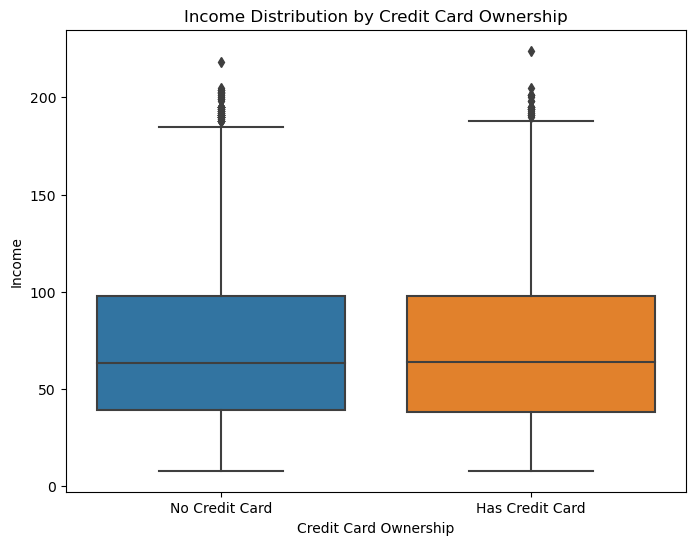

In [8]:
# Box Plot: Income vs. Credit Card Ownership
plt.figure(figsize=(8, 6))
sns.boxplot(x='CreditCard', y='Income', data=df)
plt.title('Income Distribution by Credit Card Ownership')
plt.xlabel('Credit Card Ownership')
plt.ylabel('Income')
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.show()

We can see that credit card usage has no clear effect on income.

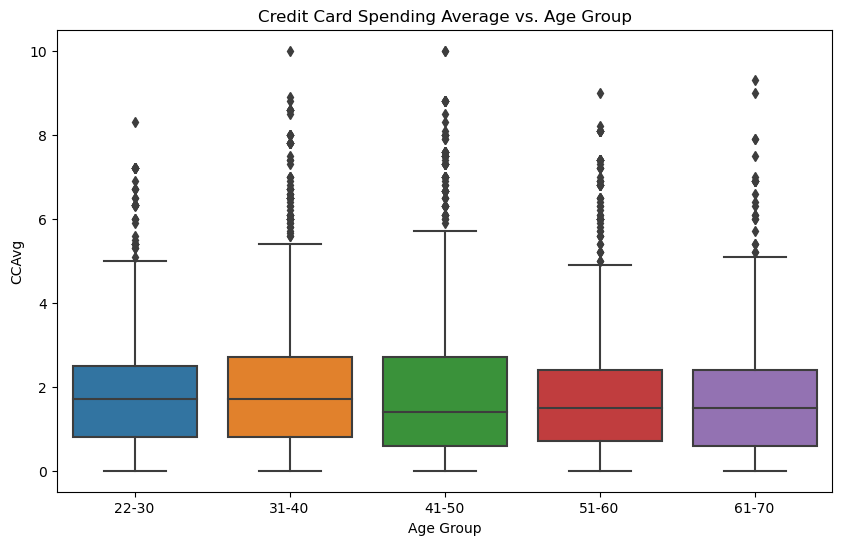

In [9]:
# Box Plot: CCAvg vs. Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_range', y='CCAvg', data=df)
plt.title('Credit Card Spending Average vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('CCAvg')
plt.show()

Younger age groups have slightly higher credit card spendings.

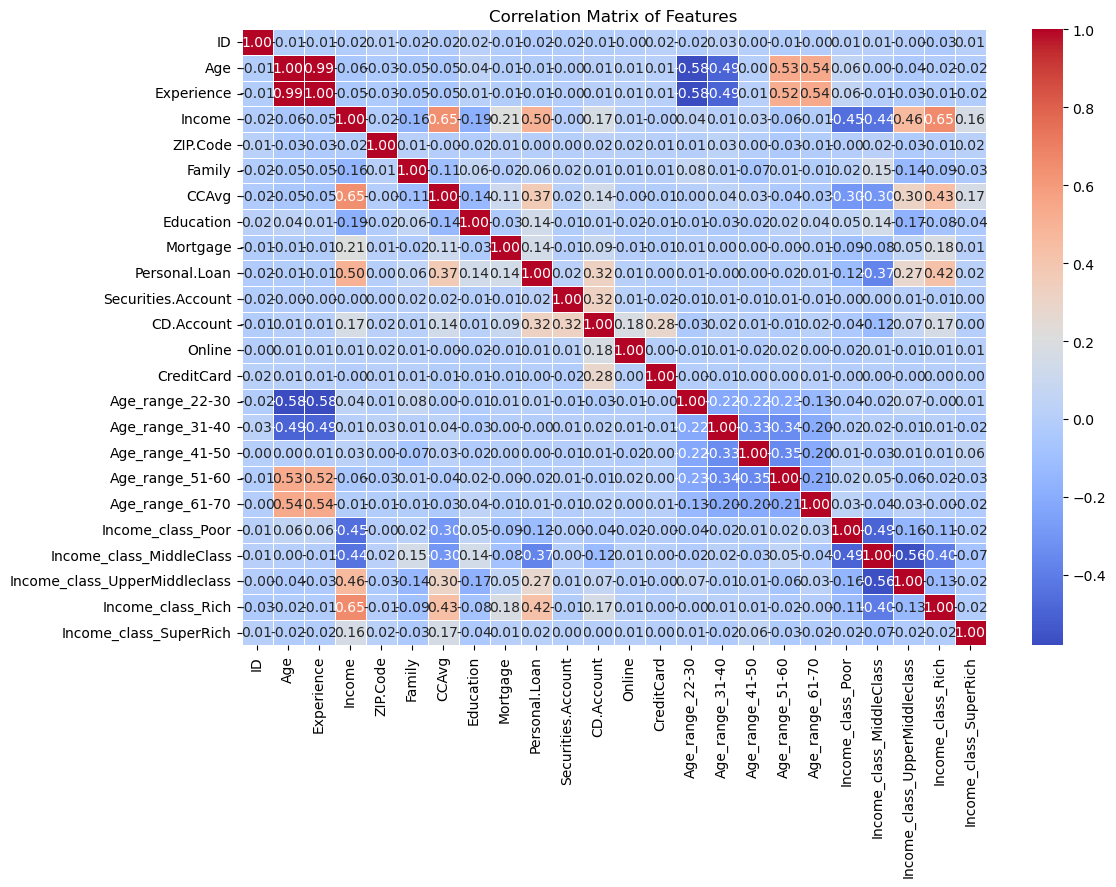

In [10]:
# Encode categorical variables into numerical values (one-hot encoding)
df_encoded = pd.get_dummies(df)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Here, we can see the correlations among different variables in the Correlation Matrix.

# Models
We will use 3 different models for analyzing the data.

1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest

Firstly, we start with logistic regression.

In [11]:
y = df['Personal.Loan']

# Convert target variable to numeric type if needed
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.907
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.65      0.25      0.36       105

    accuracy                           0.91      1000
   macro avg       0.78      0.62      0.65      1000
weighted avg       0.89      0.91      0.89      1000



/Users/umutulasbalci/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model achieved an overall accuracy of 90.7% in predicting loan approval status. It demonstrated high precision (92%) and recall (98%) for class 0 (not approved), indicating good performance in identifying instances where loans were not approved. However, for class 1 (approved), the model showed lower precision (65%) and recall (25%), suggesting limitations in correctly identifying instances of approved loans. Consequently, the model's F1-score for class 1 was relatively low at 0.36, indicating an imbalance between precision and recall for approved loans.

Now, let's try the K-Nearest Neighbors:

In [16]:
# Convert pandas DataFrames to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Train K-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.896
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.60      0.03      0.05       105

    accuracy                           0.90      1000
   macro avg       0.75      0.51      0.50      1000
weighted avg       0.87      0.90      0.85      1000



The KNN classifier performs well in predicting class 0 (not approved), with high precision, recall, and F1-score. However, it performs poorly in predicting class 1 (approved), with low precision, recall, and F1-score. This imbalance in performance suggests that the model may need further tuning or additional data to improve its ability to correctly classify approved instances. Additionally, the low recall for class 1 indicates that the model struggles to identify instances of approved loans correctly.

Lastly, we will try Random Forest.

In [21]:
# Train Support Vector Machines classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.911
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.68      0.29      0.40       105

    accuracy                           0.91      1000
   macro avg       0.80      0.64      0.68      1000
weighted avg       0.90      0.91      0.89      1000



Again, we face the same problem. The precision and recall decrease rapidly for class 1. This issue persists throughout each model, therefore it can be interpreted that there is another problem. We can try oversampling to see if we can overcome this issue.

In [27]:
# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train your model using the resampled data
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.926
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       895
           1       0.59      0.95      0.73       105

    accuracy                           0.93      1000
   macro avg       0.79      0.94      0.84      1000
weighted avg       0.95      0.93      0.93      1000



/Users/umutulasbalci/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As expected, oversampling radically improved recall and also helped with precision. Now, let's do the same for the other models as well.

In [37]:
# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train K-nearest neighbors classifier using the resampled data
knn = KNeighborsClassifier(n_neighbors=5)  # Example: K=5
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy (with Random Oversampling):", accuracy_knn)

print("KNN Classification Report (with Random Oversampling):")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy (with Random Oversampling): 0.823
KNN Classification Report (with Random Oversampling):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       895
           1       0.26      0.37      0.31       105

    accuracy                           0.82      1000
   macro avg       0.59      0.62      0.60      1000
weighted avg       0.85      0.82      0.84      1000



In [35]:
# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train Support Vector Machines classifier using the resampled data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy (with Random Oversampling):", accuracy_svm)

print("SVM Classification Report (with Random Oversampling):")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy (with Random Oversampling): 0.851
SVM Classification Report (with Random Oversampling):
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       895
           1       0.41      0.95      0.57       105

    accuracy                           0.85      1000
   macro avg       0.70      0.90      0.74      1000
weighted avg       0.93      0.85      0.87      1000



Checking these results, we can assess that while the KNN did not really have good results after the oversampling, it helped with the SVM and Logistic Regression. Now, we will print the confusion matrices for each of these.

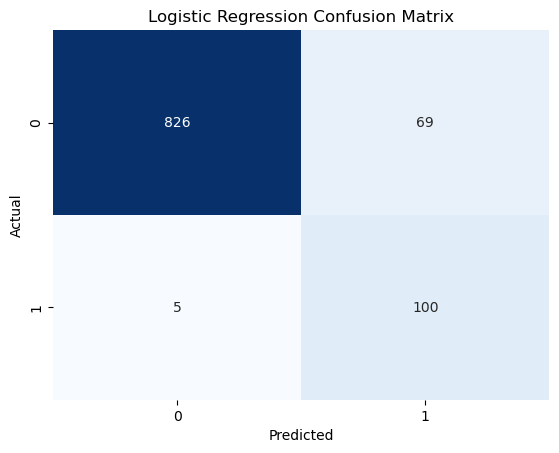

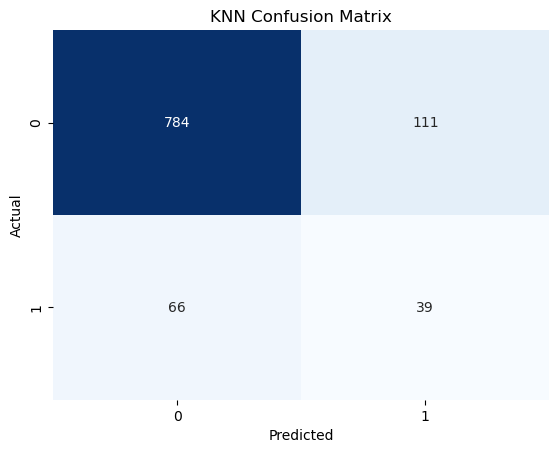

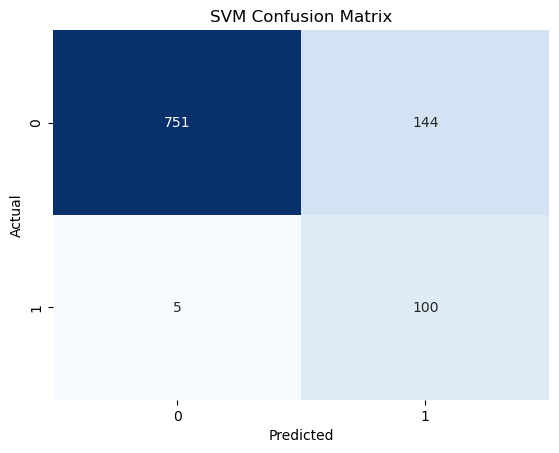

In [40]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression Confusion Matrix')

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

# Insights, Findings and Further Steps

After taking all the findings into account, we can conclude that Logistic Regression is the most effective model for making predictions on this model, as it yields the best accuracy. It achieves the highest accuracy and strikes a good balance between precision and recall for class 1. SVM has good recall but suffers from lower precision, leading to more false positives. KNN performs the worst, with low precision, recall, and accuracy.
Based on these results, if you prioritize correctly identifying approved loans (high recall), Logistic Regression would be the preferred model. However, if precision is more important, you may need to consider further tuning or exploring different approaches to address the class imbalance issue.

To further enhance our loan approval predictions, there are a few other roads worth exploring. Firstly, we could enrich our dataset with additional and more complex features like the customer's debt-to-income ratio, employment status, or credit history. These variables could offer valuable insights into a customer's financial profile and their propensity for taking out a personal loan. Moreover, using feature engineering techniques to uncover interactions and nonlinear relationships among variables could improve both the interpretability and predictive power of our models. Additionally, considering the application of sophisticated modeling approaches like ensemble methods or gradient boosting could help capture intricate data patterns and elevate overall prediction performance. Lastly, continual model evaluation and refinement through techniques such as cross-validation and hyperparameter tuning will be essential to ensure robust generalization and model stability. By methodically refining our feature set, exploring advanced modeling methodologies, and fine-tuning model parameters, we can aim for a more comprehensive understanding of the factors influencing personal loan approval, coupled with superior predictive accuracy.